<a href="https://colab.research.google.com/github/JuanPepicano/medellin-apartments-dashboard/blob/main/actividad_6_Transferencia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [4]:
df = pd.read_csv("/houses_medellin_cleaned.csv")

In [6]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Habitaciones          272 non-null    float64
 1   Baños                 271 non-null    float64
 2   Estrato               274 non-null    float64
 3   Antigüedad            217 non-null    object 
 4   Piso N°               214 non-null    object 
 5   Administración        199 non-null    float64
 6   Precio m²             274 non-null    float64
 7   Parqueaderos          212 non-null    float64
 8   Estado                150 non-null    object 
 9   Tipo de apartamento   19 non-null     object 
 10  Precio                274 non-null    int64  
 11  Área construída (m²)  274 non-null    float64
 12  Área privada (m²)     274 non-null    float64
dtypes: float64(8), int64(1), object(4)
memory usage: 28.0+ KB


,Habitaciones,Baños,Estrato,Administración,Precio m²,Parqueaderos,Precio,Área construída (m²),Área privada (m²)
count,272.000000,271.000000,274.000000,1.990000e+02,2.740000e+02,212.000000,2.740000e+02,274.000000,274.000000
mean,2.665441,2.383764,4.817518,3.918098e+05,3.101543e+09,1.457547,5.975466e+09,424.313869,122.638686
std,1.375263,1.057755,1.042812,3.180504e+05,4.483738e+10,0.676687,9.058870e+10,1685.340547,683.448820
min,1.000000,1.000000,2.000000,1.000000e+00,3.250000e+06,1.000000,9.000000e+07,28.000000,0.000000
25%,2.000000,2.000000,4.000000,1.751500e+05,3.174419e+08,1.000000,2.650000e+08,62.000000,0.000000
50%,3.000000,2.000000,5.000000,3.110000e+05,4.344086e+08,1.000000,4.160000e+08,86.000000,53.500000
75%,3.000000,3.000000,6.000000,5.325000e+05,5.280436e+08,2.000000,6.300000e+08,129.250000,98.000000
max,20.000000,6.000000,6.000000,2.500000e+06,7.425743e+11,5.000000,1.500000e+12,12597.000000,8023.000000


In [29]:
df_filtered = df.dropna(subset=["Estrato", "Precio"])

# Aplicar ANOVA para comparar medias de precios entre estratos
anova_test = stats.f_oneway(
    *[df_filtered[df_filtered["Estrato"] == e]["Precio"] for e in df_filtered["Estrato"].unique()]
)

print("Estadístico ANOVA:", anova_test.statistic)
print("p-valor:", anova_test.pvalue)

Estadístico ANOVA: 0.6345149663851208
p-valor: 0.6382855722325034


In [101]:
df_filtered = df.dropna(subset=["Estrato", "Precio","Banos", "AreaConstruida","Habitaciones","Parqueaderos","Administración"])

In [102]:

shapiro_test = stats.shapiro(df_filtered["Precio"])
print("Estadístico Shapiro-Wilk:", shapiro_test.statistic)
print("p-valor:", shapiro_test.pvalue)

Estadístico Shapiro-Wilk: 0.0515706055511137
p-valor: 2.8532510654733807e-28


In [107]:
kruskal_test = stats.kruskal(
    *[df_filtered[df_filtered["Estrato"] == e]["Precio"] for e in df_filtered["Estrato"].unique()]
)
print("Estadístico Kruskal-Wallis:", kruskal_test.statistic)
print("p-valor:", kruskal_test.pvalue)
print("p-valor:", kruskal_test.pvalue)


Estadístico Kruskal-Wallis: 71.65480936213402
p-valor: 1.8873717251746308e-15
p-valor: 1.8873717251746308e-15


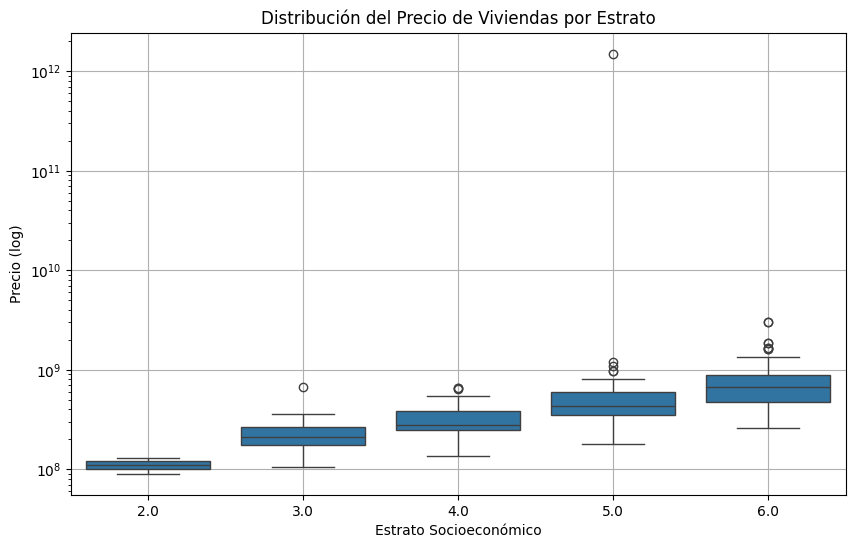

In [33]:

plt.figure(figsize=(10,6))
sns.boxplot(x="Estrato", y="Precio", data=df_filtered)
plt.yscale("log")  # Escala logarítmica para mejor visualización
plt.xlabel("Estrato Socioeconómico")
plt.ylabel("Precio (log)")
plt.title("Distribución del Precio de Viviendas por Estrato")
plt.grid(True)
plt.show()


In [34]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.preprocessing import StandardScaler

In [75]:
features = ["Habitaciones", "Banos", "AreaConstruida"]
target = "Precio"


In [76]:
df_filtered = df.dropna(subset=features + [target])

# Datos en entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(
    df_filtered[features], df_filtered[target], test_size=0.3, random_state=42
)

In [77]:

model = LinearRegression()
model.fit(X_train, y_train)
coef = model.coef_
intercept = model.intercept_

y_pred = model.predict(X_test)


In [16]:
pip install dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 84.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 16.0 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0


In [79]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [80]:
print("Coeficientes:", coef)
print("Intercepto:", intercept)
print("MSE:", mse)
print("R²:", r2)


Coeficientes: [-3.47604377e+09  1.87764609e+10 -9.13548806e+05]
Intercepto: -26816691745.336994
MSE: 3.0088645110169725e+20
R²: -2510.4208306215746


In [81]:
X = df_filtered[features]
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("VIF después de eliminación de variables:")
print(vif_data)

VIF después de eliminación de variables:
         Variable       VIF
0    Habitaciones  4.596384
1           Banos  4.570385
2  AreaConstruida  1.060925


In [85]:
# Asegúrate de trabajar sobre una copia del DataFrame
df_filtered = df_filtered.copy()

# Calcular el logaritmo del precio
df_filtered['Log_Precio'] = np.log(df_filtered['Precio'])

# Escalar las variables predictoras
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_filtered[features])

# Dividir en entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, df_filtered["Log_Precio"], test_size=0.3, random_state=42
)


In [97]:
df_filtered = df_filtered.copy()
df_filtered.loc[:, "Estrato_binario"] = df_filtered["Estrato"].apply(lambda x: 1 if x >= 5 else 0)

# Seleccionar variable continua y variable categórica
X_logistic = df_filtered[["AreaConstruida"]]
y_logistic = df_filtered["Estrato_binario"]
#"Banos", "AreaConstruida"
# Escalar la variable predictora
scaler = StandardScaler()
X_logistic_scaled = scaler.fit_transform(X_logistic)

# División de datos en entrenamiento (70%) y prueba (30%)
X_train_logistic, X_test_logistic, y_train_logistic, y_test_logistic = train_test_split(
    X_logistic_scaled, y_logistic, test_size=0.3, random_state=42
)

# Crear y entrenar el modelo de regresión logística
model_logistic = LogisticRegression(C=1.0, solver='lbfgs')
model_logistic.fit(X_train_logistic, y_train_logistic)

# Obtener coeficientes e intercepto
coef_logistic = model_logistic.coef_
intercept_logistic = model_logistic.intercept_

print("Coeficientes:", coef_logistic)
print("Intercepto:", intercept_logistic)

Coeficientes: [[-0.01232626]]
Intercepto: [0.39653134]


In [89]:

# Crear variable binaria: Estrato alto (5-6) vs. Estrato bajo (1-4)
df_filtered = df_filtered.copy()
df_filtered.loc[:, "Estrato_binario"] = df_filtered["Estrato"].apply(lambda x: 1 if x >= 5 else 0)

# Seleccionar variables predictoras
features_logistic = ["AreaConstruida", "Habitaciones", "Banos", "Precio"]
X_logistic = df_filtered[features_logistic]
y_logistic = df_filtered["Estrato_binario"]

# Escalar las variables predictoras
scaler = StandardScaler()
X_logistic_scaled = scaler.fit_transform(X_logistic)

# División de datos en entrenamiento (70%) y prueba (30%)
X_train_logistic, X_test_logistic, y_train_logistic, y_test_logistic = train_test_split(
    X_logistic_scaled, y_logistic, test_size=0.3, random_state=42
)

best_accuracy = 0
best_model = None
best_c = None

for c in [0.1, 1.0, 10.0]:
    model_logistic = LogisticRegression(C=c, solver='liblinear')
    model_logistic.fit(X_train_logistic, y_train_logistic)
    acc = model_logistic.score(X_test_logistic, y_test_logistic)
    print(f"C={c}, Precisión={acc}")
    if acc > best_accuracy:
        best_accuracy = acc
        best_model = model_logistic
        best_c = c

print(f"Mejor modelo con C={best_c}, Precisión={best_accuracy}")

C=0.1, Precisión=0.6829268292682927
C=1.0, Precisión=0.6219512195121951
C=10.0, Precisión=0.6219512195121951
Mejor modelo con C=0.1, Precisión=0.6829268292682927


In [90]:
y_pred_logistic = best_model.predict(X_test_logistic)
y_prob_logistic = best_model.predict_proba(X_test_logistic)[:, 1]

# Evaluar precisión y métricas adicionales
accuracy = accuracy_score(y_test_logistic, y_pred_logistic)
conf_matrix = confusion_matrix(y_test_logistic, y_pred_logistic)
class_report = classification_report(y_test_logistic, y_pred_logistic)

print("Precisión del modelo mejorado:", accuracy)
print("Matriz de confusión:\n", conf_matrix)
print("Reporte de clasificación:\n", class_report)

Precisión del modelo mejorado: 0.6829268292682927
Matriz de confusión:
 [[ 8 21]
 [ 5 48]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.62      0.28      0.38        29
           1       0.70      0.91      0.79        53

    accuracy                           0.68        82
   macro avg       0.66      0.59      0.58        82
weighted avg       0.67      0.68      0.64        82



In [91]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Modelo
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predicciones
y_pred_rf = rf_model.predict(X_test)

# Evaluación
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Importancia de variables
importancia = dict(zip(features, rf_model.feature_importances_))

print(f"MSE: {mse_rf:.4f}")
print(f"R²: {r2_rf:.4f}")
print("Importancia de variables:")
for var, imp in importancia.items():
    print(f"  - {var}: {imp:.2%}")


MSE: 0.1314
R²: 0.5214
Importancia de variables:
  - Habitaciones: 7.61%
  - Banos: 29.73%
  - AreaConstruida: 62.66%


Mejor hiperparámetro: {'C': 0.01, 'solver': 'liblinear'}
Mejor score (validación cruzada): 0.6294452347083926
Precisión del modelo mejorado: 0.6951219512195121
Matriz de confusión:
 [[ 8 21]
 [ 4 49]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.67      0.28      0.39        29
           1       0.70      0.92      0.80        53

    accuracy                           0.70        82
   macro avg       0.68      0.60      0.59        82
weighted avg       0.69      0.70      0.65        82



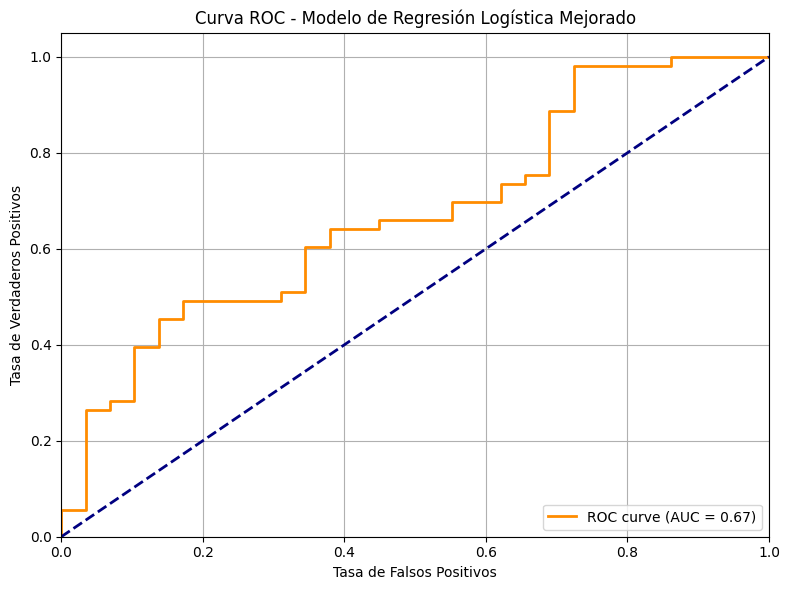

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report,
                             roc_curve, auc)

df_filtered = df.dropna(subset=["Habitaciones", "Banos", "AreaConstruida", "Precio", "Estrato"]).copy()


df_filtered.loc[:, "Estrato_binario"] = df_filtered["Estrato"].apply(lambda x: 1 if x >= 5 else 0)

# Seleccionar variables predictoras y variable objetivo
features_logistic = ["AreaConstruida", "Habitaciones", "Banos", "Precio"]
X_logistic = df_filtered[features_logistic]
y_logistic = df_filtered["Estrato_binario"]

# Escalar las variables predictoras
scaler = StandardScaler()
X_logistic_scaled = scaler.fit_transform(X_logistic)

# División de datos en entrenamiento (70%) y prueba (30%)
X_train_logistic, X_test_logistic, y_train_logistic, y_test_logistic = train_test_split(
    X_logistic_scaled, y_logistic, test_size=0.3, random_state=42
)

# --- 2. Optimización del Modelo con GridSearchCV ---
param_grid = {'C': [0.01, 0.1, 1.0, 10.0, 100.0], 'solver': ['liblinear']}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_logistic, y_train_logistic)

print("Mejor hiperparámetro:", grid.best_params_)
print("Mejor score (validación cruzada):", grid.best_score_)

# Seleccionar el mejor modelo
best_model = grid.best_estimator_

y_pred_logistic = best_model.predict(X_test_logistic)
y_prob_logistic = best_model.predict_proba(X_test_logistic)[:, 1]

accuracy = accuracy_score(y_test_logistic, y_pred_logistic)
conf_matrix = confusion_matrix(y_test_logistic, y_pred_logistic)
class_report = classification_report(y_test_logistic, y_pred_logistic)

print("Precisión del modelo mejorado:", accuracy)
print("Matriz de confusión:\n", conf_matrix)
print("Reporte de clasificación:\n", class_report)


fpr, tpr, thresholds = roc_curve(y_test_logistic, y_prob_logistic)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Modelo de Regresión Logística Mejorado')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

Mejor hiperparámetro: {'C': 1.0, 'solver': 'liblinear'}
Mejor score (validación cruzada): 0.7713768115942029
Precisión del modelo: 0.7647058823529411
Matriz de confusión:
 [[ 1  9]
 [ 3 38]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.25      0.10      0.14        10
           1       0.81      0.93      0.86        41

    accuracy                           0.76        51
   macro avg       0.53      0.51      0.50        51
weighted avg       0.70      0.76      0.72        51



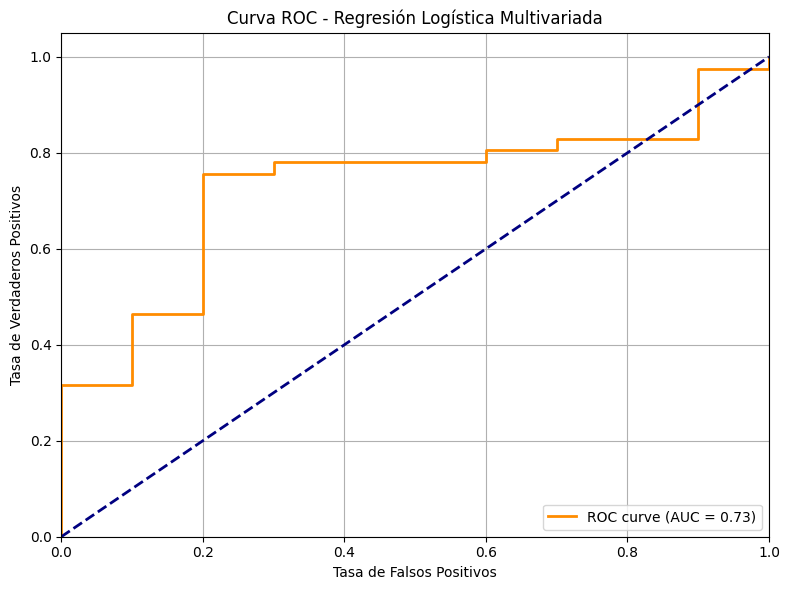

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report,
                             roc_curve, auc)

df = pd.read_csv("/houses_medellin_cleaned.csv")

df.rename(columns={
    'Baños': 'Banos',
    'Área construída (m²)': 'AreaConstruida',
    'Administración': 'Administracion'
}, inplace=True)

features_logistic = ["AreaConstruida", "Habitaciones", "Banos", "Precio", "Parqueaderos", "Administracion"]
target = "Estrato"
df_filtered = df.dropna(subset=features_logistic + [target]).copy()

df_filtered.loc[:, "Estrato_binario"] = df_filtered["Estrato"].apply(lambda x: 1 if x >= 5 else 0)


X = df_filtered[features_logistic]
y = df_filtered["Estrato_binario"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


param_grid = {'C': [0.01, 0.1, 1.0, 10.0, 100.0], 'solver': ['liblinear']}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Mejor hiperparámetro:", grid.best_params_)
print("Mejor score (validación cruzada):", grid.best_score_)

best_model = grid.best_estimator_

y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

accuracy_val = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Precisión del modelo:", accuracy_val)
print("Matriz de confusión:\n", conf_matrix)
print("Reporte de clasificación:\n", class_report)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC - Regresión Logística Multivariada")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


In [123]:
import dash
from dash import dcc, html, Input, Output, dash_table
import pandas as pd
import plotly.express as px

# Cargar datos
df = pd.read_csv("/houses_medellin_cleaned.csv")

# Renombrar columnas para uso consistente
df.rename(columns={
    'Área construída (m²)': 'AreaConstruida',
    'Baños': 'Banos',
    'Administración': 'Administracion'
}, inplace=True)

app = dash.Dash(__name__)
server = app.server

def filter_by_group(df, variable):
    """
    Filtra el DataFrame eliminando outliers a nivel de cada grupo de Estrato,
    conservando solo los registros entre el percentil 5 y el 95% de cada grupo.
    """
    groups = []
    for estrato, group in df.groupby("Estrato"):
        lower = group[variable].quantile(0.05)
        upper = group[variable].quantile(0.95)
        group_filtered = group[(group[variable] >= lower) & (group[variable] <= upper)]
        groups.append(group_filtered)
    return pd.concat(groups)

# Layout del dashboard
app.layout = html.Div([
    html.H1("Dashboard: Precio de Apartamentos en Medellín por Estrato"),

    html.Div([
        html.Label("Seleccionar variable para boxplot"),
        dcc.Dropdown(
            id='variable_dropdown',
            options=[
                {'label': 'Precio', 'value': 'Precio'},
                {'label': 'Área Construida', 'value': 'AreaConstruida'},
                {'label': 'Habitaciones', 'value': 'Habitaciones'},
                {'label': 'Baños', 'value': 'Banos'},
                {'label': 'Administración', 'value': 'Administracion'},
                {'label': 'Parqueaderos', 'value': 'Parqueaderos'}
            ],
            value='Precio'
        )
    ], style={'width': '40%', 'display': 'inline-block'}),

    dcc.Graph(id='boxplot_graph', style={'width': '100%', 'height': '600px'}),

    html.Div([
        html.Label("Filtrar por número de baños"),
        dcc.Slider(
            id='banos_slider',
            min=int(df['Banos'].min()),
            max=int(df['Banos'].max()),
            step=1,
            marks={int(b): str(int(b)) for b in sorted(df['Banos'].dropna().unique())},
            value=int(df['Banos'].min())
        )
    ], style={'width': '80%', 'padding': '40px'}),

    dcc.Graph(id='scatter_area_precio', style={'width': '100%', 'height': '600px'}),

    html.Div([
        html.H3("Narrativa"),
        html.P("Antes de presentar el dashboard a la audiencia, se han realizado ajustes para que los gráficos sean más claros. "
               "Se han removido los datos extremos (outliers) a nivel de cada estrato, limitando los valores mostrados a los percentiles "
               "5 y 95 de cada grupo. Esto evita espacios en blanco innecesarios y facilita la interpretación visual para usuarios no técnicos, "
               "permitiendo ver de forma clara las tendencias y patrones en el mercado inmobiliario.")
    ], style={"padding": "20px"})
])

# Callback para actualizar el boxplot con eliminación de outliers a nivel de cada grupo
@app.callback(
    Output('boxplot_graph', 'figure'),
    Input('variable_dropdown', 'value')
)
def update_boxplot(variable):
    # Filtrar los datos por grupo para eliminar outliers en cada estrato
    df_filtered_group = filter_by_group(df, variable)

    # Para "Precio" se puede aplicar logaritmo en el eje y para mejorar la visualización
    log_y = True if variable == 'Precio' else False

    fig = px.box(df_filtered_group, x='Estrato', y=variable, points="all",
                 log_y=log_y,
                 title=f"Distribución de {variable} por Estrato (Datos entre 5% y 95% por grupo)")
    return fig

# Callback para actualizar el scatter plot según el filtro de baños
@app.callback(
    Output('scatter_area_precio', 'figure'),
    Input('banos_slider', 'value')
)
def update_scatter(banos):
    filtered_df = df[df['Banos'] == banos]
    fig = px.scatter(filtered_df, x='AreaConstruida', y='Precio', color='Estrato',
                     title=f"Precio vs. Área Construida para {banos} baños")
    return fig

if __name__ == '__main__':
    app.run(debug=True)




<IPython.core.display.Javascript object>